### Практическая работа №1
Первичный анализ датасета

* Название: [Used Car Listings: Features and Price Prediction](https://www.kaggle.com/datasets/tamerkanak/used-car-dataset/data)
* Датасет содержит информацию о б/у автомобилях, их характеристики и стоимость

Описание признаков датасета
- brand: Марка автомобиля.  
- model: Модель автомобиля.  
- year: Год выпуска автомобиля.  
- mileage: Пробег автомобиля.  
- engine: Информация о двигателе автомобиля.  
- engine_size: Объем двигателя автомобиля.  
- transmission: Тип трансмиссии автомобиля.  
- automatic_transmission: Бинарное значение, указывающее наличие автоматической трансмиссии (1: Да, 0: Нет).  
- fuel_type: Тип топлива автомобиля.  
- drivetrain: Тип привода автомобиля.  
- min_mpg: Минимальный расход топлива автомобиля.  
- max_mpg: Максимальный расход топлива автомобиля.  
- damaged: Бинарное значение, указывающее наличие повреждений у автомобиля (1: Да, 0: Нет).  
- first_owner: Является ли автомобиль автомобилем первого владельца? (1: Да, 0: Нет).  
- personal_using: Используется ли автомобиль только для личных целей? (1: Да, 0: Нет).  
- turbo: Бинарное значение, указывающее наличие турбонаддува (1: Да, 0: Нет).  
- alloy_wheels: Наличие легкосплавных дисков (1: Да, 0: Нет).  
- adaptive_cruise_control: Наличие адаптивного круиз-контроля (1: Да, 0: Нет).  
- navigation_system: Наличие навигационной системы (1: Да, 0: Нет).  
- power_liftgate: Наличие электропривода крышки багажника (1: Да, 0: Нет).  
- backup_camera: Наличие камеры заднего вида (1: Да, 0: Нет).  
- keyless_start: Наличие бесключевого запуска (1: Да, 0: Нет).  
- remote_start: Наличие удаленного запуска (1: Да, 0: Нет).  
- sunroof/moonroof: Наличие люка или панорамной крыши (1: Да, 0: Нет).  
- automatic_emergency_braking: Наличие системы автоматического экстренного торможения (1: Да, 0: Нет).  
- stability_control: Наличие системы курсовой устойчивости (1: Да, 0: Нет).  
- leather_seats: Наличие кожаных сидений (1: Да, 0: Нет).  
- memory_seat: Наличие сидений с памятью положения (1: Да, 0: Нет).  
- third_row_seating: Наличие третьего ряда сидений (1: Да, 0: Нет).  
- apple_car_play/android_auto: Наличие интеграции с Apple CarPlay / Android Auto (1: Да, 0: Нет).  
- bluetooth: Наличие Bluetooth (1: Да, 0: Нет).  
- usb_port: Наличие USB портов (1: Да, 0: Нет).  
- heated_seats: Наличие подогрева сидений (1: Да, 0: Нет).  
- interior_color: Цвет интерьера автомобиля.  
- exterior_color: Цвет кузова автомобиля.  
- price: Цена автомобиля. Это целевая переменная данного датасета.

In [1]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.model_selection import train_test_split

/home/max/work_area/python_direct/venv/lib/python3.12/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.22.4 and <2.3.0 is required for this version of SciPy (detected version 2.3.3)
  from scipy.stats import gaussian_kde


In [2]:
file_path = "train.csv"
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tugberkkaran/used-car-listings-features-and-prices-carscom",
  file_path,
)
df.head()

/tmp/ipykernel_85010/3777000105.py:2: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,0.0,1.0,1.0,0.0,0.0,1.0,Black,Snowflake White Pearl,36789
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,Black,Rosso Competizione Tri-Coat,39993
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,1.0,Gasoline,Four-wheel Drive,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Jet Black,Silver Ice Metallic,46986
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,1.0,Gasoline,Four-wheel Drive,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,Ebony,Fuji White,141999
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,1.0,Gasoline,Front-wheel Drive,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,Black,White,21595


Выведем количество NaN значений по столбцам

In [3]:
df.isna().sum()

brand                             2
model                             2
year                              2
mileage                           2
engine                           47
engine_size                    1249
transmission                    105
automatic_transmission            2
fuel_type                         2
drivetrain                        2
min_mpg                        3006
max_mpg                        3006
damaged                         169
first_owner                     306
personal_using                  189
turbo                             2
alloy_wheels                      2
adaptive_cruise_control           2
navigation_system                 2
power_liftgate                    2
backup_camera                     2
keyless_start                     2
remote_start                      2
sunroof/moonroof                  2
automatic_emergency_braking       2
stability_control                 2
leather_seats                     2
memory_seat                 

Вероятно в датасете есть две строки состоящие исключительно из NaN значений. Проверим.

In [4]:
filtered_df = df[df['model'].isna() & df['brand'].isna()]
filtered_df

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,drivetrain,...,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,interior_color,exterior_color,price
3925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Удалим эти строки

In [5]:
df = df.dropna(subset=['model', 'brand'], how='all')

Выведем общую информацию о датасете и определим какие столбцы имеют тип object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19107 entries, 0 to 19108
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   brand                        19107 non-null  object 
 1   model                        19107 non-null  object 
 2   year                         19107 non-null  float64
 3   mileage                      19107 non-null  float64
 4   engine                       19062 non-null  object 
 5   engine_size                  17860 non-null  float64
 6   transmission                 19004 non-null  object 
 7   automatic_transmission       19107 non-null  float64
 8   fuel_type                    19107 non-null  object 
 9   drivetrain                   19107 non-null  object 
 10  min_mpg                      16101 non-null  float64
 11  max_mpg                      16101 non-null  float64
 12  damaged                      18940 non-null  float64
 13  first_owner          

price - это целевая переменная датасета и хотим чтобы она была числом

In [7]:
non_numeric_prices = df.loc[pd.to_numeric(df['price'], errors='coerce').isna(), 'price']
print("Количество уникальных не числовых значений", non_numeric_prices.nunique())
print("Количество не числовых значений", len(non_numeric_prices))
print(non_numeric_prices[:4])


Количество уникальных не числовых значений 1
Количество не числовых значений 32
64      ot Priced
514     ot Priced
969     ot Priced
2638    ot Priced
Name: price, dtype: object


In [8]:
df = df[df['price'] != 'ot Priced']
df['price'] = pd.to_numeric(df['price'])

Выведем информацию о средних и отклонениях для определения метода заполнения пропусков

In [9]:
df.describe()

,year,mileage,engine_size,automatic_transmission,min_mpg,max_mpg,damaged,first_owner,personal_using,turbo,...,automatic_emergency_braking,stability_control,leather_seats,memory_seat,third_row_seating,apple_car_play/android_auto,bluetooth,usb_port,heated_seats,price
count,19075.000000,19075.000000,17828.000000,19075.000000,16072.000000,16072.000000,18909.000000,18772.000000,18889.000000,19075.000000,...,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,19075.000000,1.907500e+04
mean,2017.780760,47871.966815,2.973850,0.917326,20.827464,27.816980,0.217304,0.517846,0.718355,0.404351,...,0.174574,0.949777,0.697195,0.486396,0.148886,0.387785,0.870511,0.351822,0.485767,3.696284e+04
std,4.990623,38154.878209,5.482707,0.275396,6.020088,6.515037,0.412422,0.499695,0.449813,0.490779,...,0.379612,0.218410,0.459484,0.499828,0.355985,0.487258,0.335749,0.477551,0.499810,3.512381e+04
min,1962.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.495000e+03
25%,2016.000000,19297.000000,2.000000,1.000000,17.000000,24.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.079700e+04
50%,2019.000000,39120.000000,2.500000,1.000000,20.000000,28.000000,0.000000,1.000000,1.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.099500e+04
75%,2021.000000,68334.500000,3.500000,1.000000,24.000000,31.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,4.395000e+04
max,2024.000000,383614.000000,390.000000,1.000000,89.000000,100.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.750000e+06


Заполним пропуски по принципу:
* engine, transmission, interior_color, exterior_color заполняем модой по значению для аналогичных моделей авто, если таковые есть, иначе Unknown
* engine_size заполняем аналогично, но вместо Unknown берем среднее по марке, иначе модой по всему датасету
* personal_using так же заполняем модой по модели авто, т.к. часто для бизнес и производственных задач используются конкретные марки авто и если продавец этого не указал, ориентируемся на большинство таких авто, если таких авто больше нет, то считаем, что оно использовалось для личных целей.
* first_owner заполняем нулями, т.к. продавец знает, что это может влиять на цену авто и если не указал или не прошел проверку, значит не первый владелец
* damaged заполняем 1 если авто старше 20 лет и объем двигателя не меньше 2.0

In [10]:
df['engine'] = df.groupby(['brand', 'model'])['engine'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['engine_size'] = df.groupby(['brand', 'model'])['engine_size'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x))
df['engine_size'] = df.groupby(['brand'])['engine_size'].transform(lambda x: x.fillna(x.mean() if not x.empty else df['engine_size'].mode()))
df['transmission'] = df.groupby(['brand', 'model'])['transmission'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['interior_color'] = df.groupby(['brand', 'year'])['interior_color'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['exterior_color'] = df.groupby(['brand', 'year'])['exterior_color'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 'Unknown'))
df['personal_using'] = df.groupby(['brand', 'model'])['personal_using'].transform(lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else 1))
df['first_owner'] = df['first_owner'].fillna(0)

mask_nan = df['damaged'].isna()
condition = (df['year'] < 2005) & (df['engine_size'] >= 2.0)
df.loc[mask_nan & condition, 'damaged'] = 1
df.loc[mask_nan & ~condition, 'damaged'] = 0

df.isna().sum()

brand                             0
model                             0
year                              0
mileage                           0
engine                            0
engine_size                       0
transmission                      0
automatic_transmission            0
fuel_type                         0
drivetrain                        0
min_mpg                        3003
max_mpg                        3003
damaged                           0
first_owner                       0
personal_using                    0
turbo                             0
alloy_wheels                      0
adaptive_cruise_control           0
navigation_system                 0
power_liftgate                    0
backup_camera                     0
keyless_start                     0
remote_start                      0
sunroof/moonroof                  0
automatic_emergency_braking       0
stability_control                 0
leather_seats                     0
memory_seat                 

Построим гистограммы некоторых численных признаков

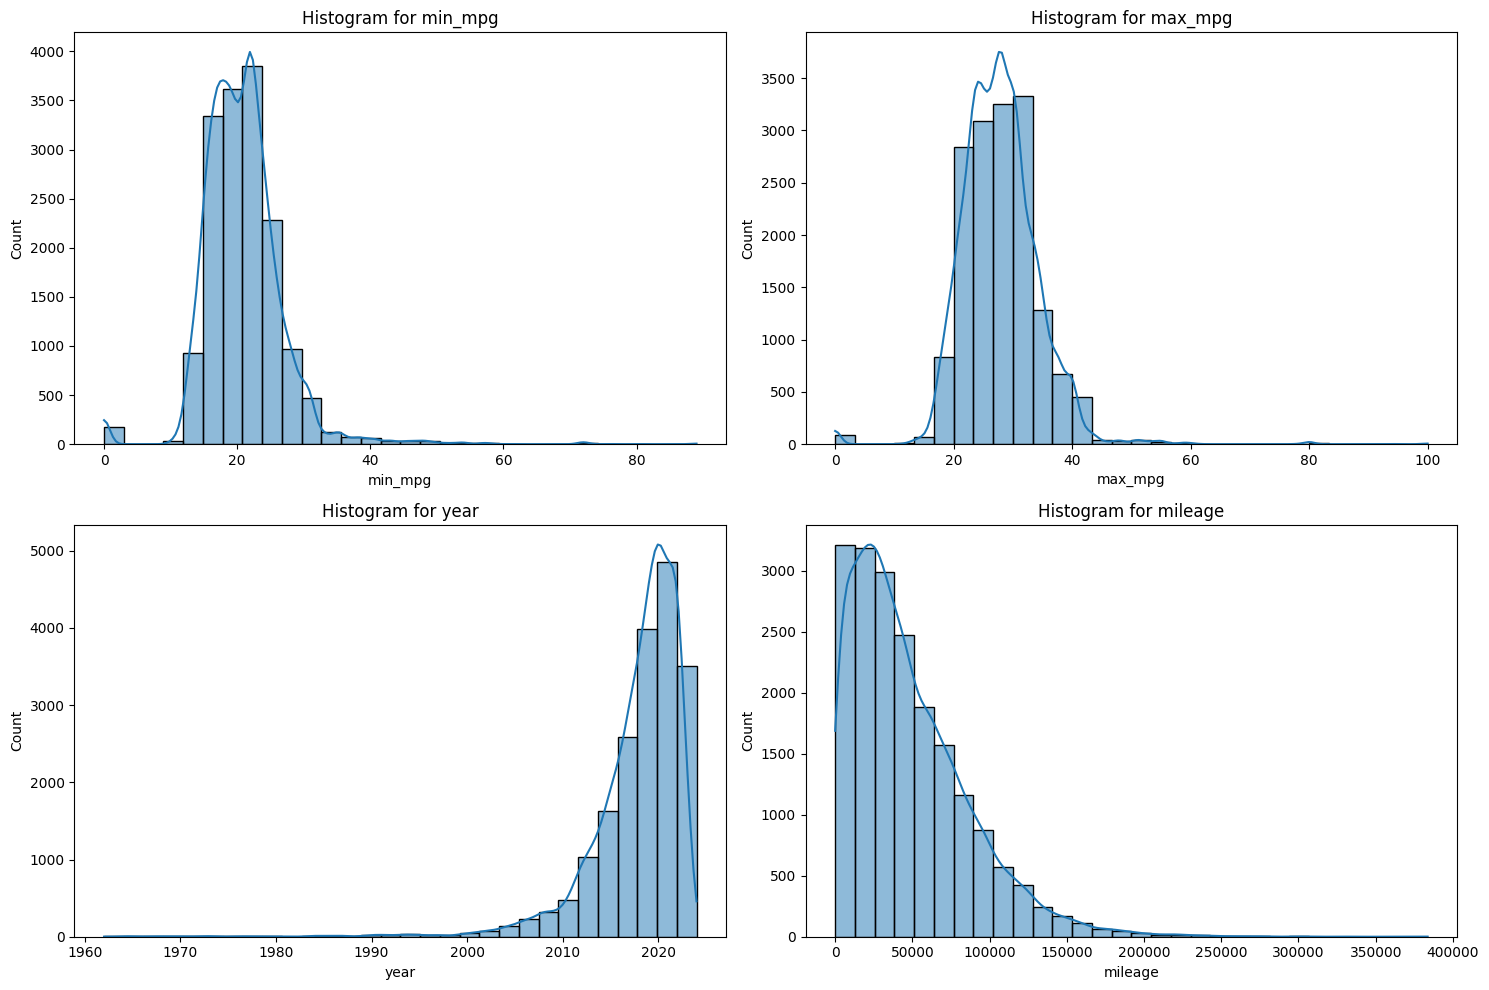

In [11]:
columns = ['min_mpg', 'max_mpg', 'year', 'mileage']

plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()


Видим для min_mpg и max_mpg значения близкие к нулю. Посмотрим на эти строки. Распределения по году и пробегу можно проверить на логнормальное
 или другое и изменить, но в рамках дз не пердусмотрено, поэтому просто стандартизирую.

In [12]:
filtered_df = df[df['max_mpg'] < 10]
selected_columns = filtered_df[['brand', 'model', 'year', 'mileage', 'engine_size', 'fuel_type', 'min_mpg', 'max_mpg', 'transmission', 'damaged']]
selected_columns[:15]

,brand,model,year,mileage,engine_size,fuel_type,min_mpg,max_mpg,transmission,damaged
198,Ford,F-150 Lariat,2001.0,62949.0,5.4,Gasoline,0.0,0.0,Automatic,1.0
543,Honda,Prelude Si 4WS,1991.0,180749.0,2.1,Unknown,0.0,0.0,4-Speed Automatic,0.0
587,Ford,F-250 XLT,2017.0,78598.0,6.2,Gasoline,0.0,0.0,Automatic,0.0
667,Ford,Transit-150 Base,2021.0,18162.0,3.7,Gasoline,0.0,0.0,Automatic,0.0
748,Chevrolet,Silverado 2500 LT,2020.0,31581.0,6.6,Diesel,0.0,0.0,10-Speed Automatic,0.0
920,Nissan,NV Passenger NV3500 HD S V6/S V8,2016.0,71216.0,4.0,Gasoline,0.0,0.0,5-Speed Automatic,0.0
1056,Hyundai,Sonata SE,2015.0,132675.0,2.4,Gasoline,0.0,0.0,6-Speed Automatic,0.0
1198,Alfa,Romeo Giulia Ti,2017.0,53661.0,2.0,Gasoline,0.0,0.0,8-Speed Automatic,0.0
1735,Mitsubishi,Outlander Sport,2019.0,70075.0,2.0,Gasoline,0.0,0.0,Automatic CVT,0.0
2165,Hyundai,Genesis 3.8,2015.0,91660.0,3.8,Gasoline,0.0,0.0,8-Speed Automatic,1.0


Расход топлива (в милях на галон) не может быть равен 0. Даже если авто не "на ходу" вносят данные из технических характеристик, поэтому заменим средними значениями по наиболее влияющим факторам, если в группе нет других экземпляров, то средним по всему датасету. (я бы предпочел обучать модель почти для заполнения пропусков, но в рамках дз испоьзуем статистику)

In [13]:
df.loc[df['min_mpg'] == 0, 'min_mpg'] = np.nan
df.loc[df['max_mpg'] == 0, 'max_mpg'] = np.nan

df['min_mpg'] = df.groupby(['engine_size', 'turbo', 'fuel_type'])['min_mpg'].transform(lambda x: x.fillna(x.mean()))
df['max_mpg'] = df.groupby(['engine_size', 'turbo', 'fuel_type'])['max_mpg'].transform(lambda x: x.fillna(x.mean()))
df['min_mpg'] = df['min_mpg'].fillna(df['min_mpg'].mean())
df['max_mpg'] = df['max_mpg'].fillna(df['max_mpg'].mean())

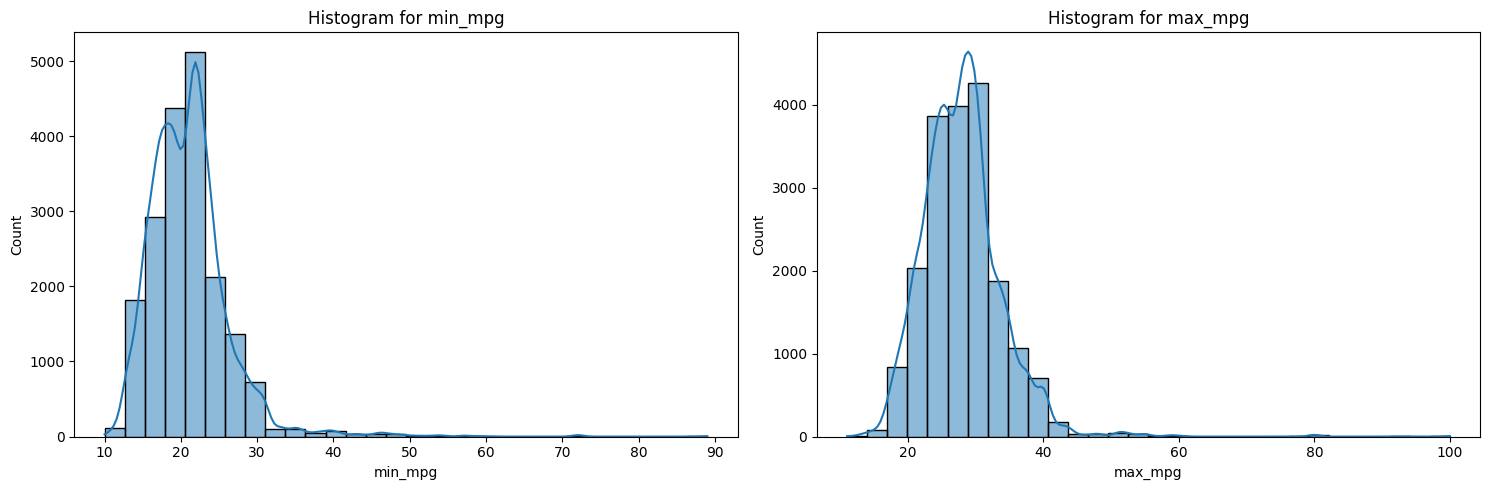

In [14]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(columns[:2], 1):
    plt.subplot(1, 2, i)
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title(f'Histogram for {col}')

plt.tight_layout()
plt.show()

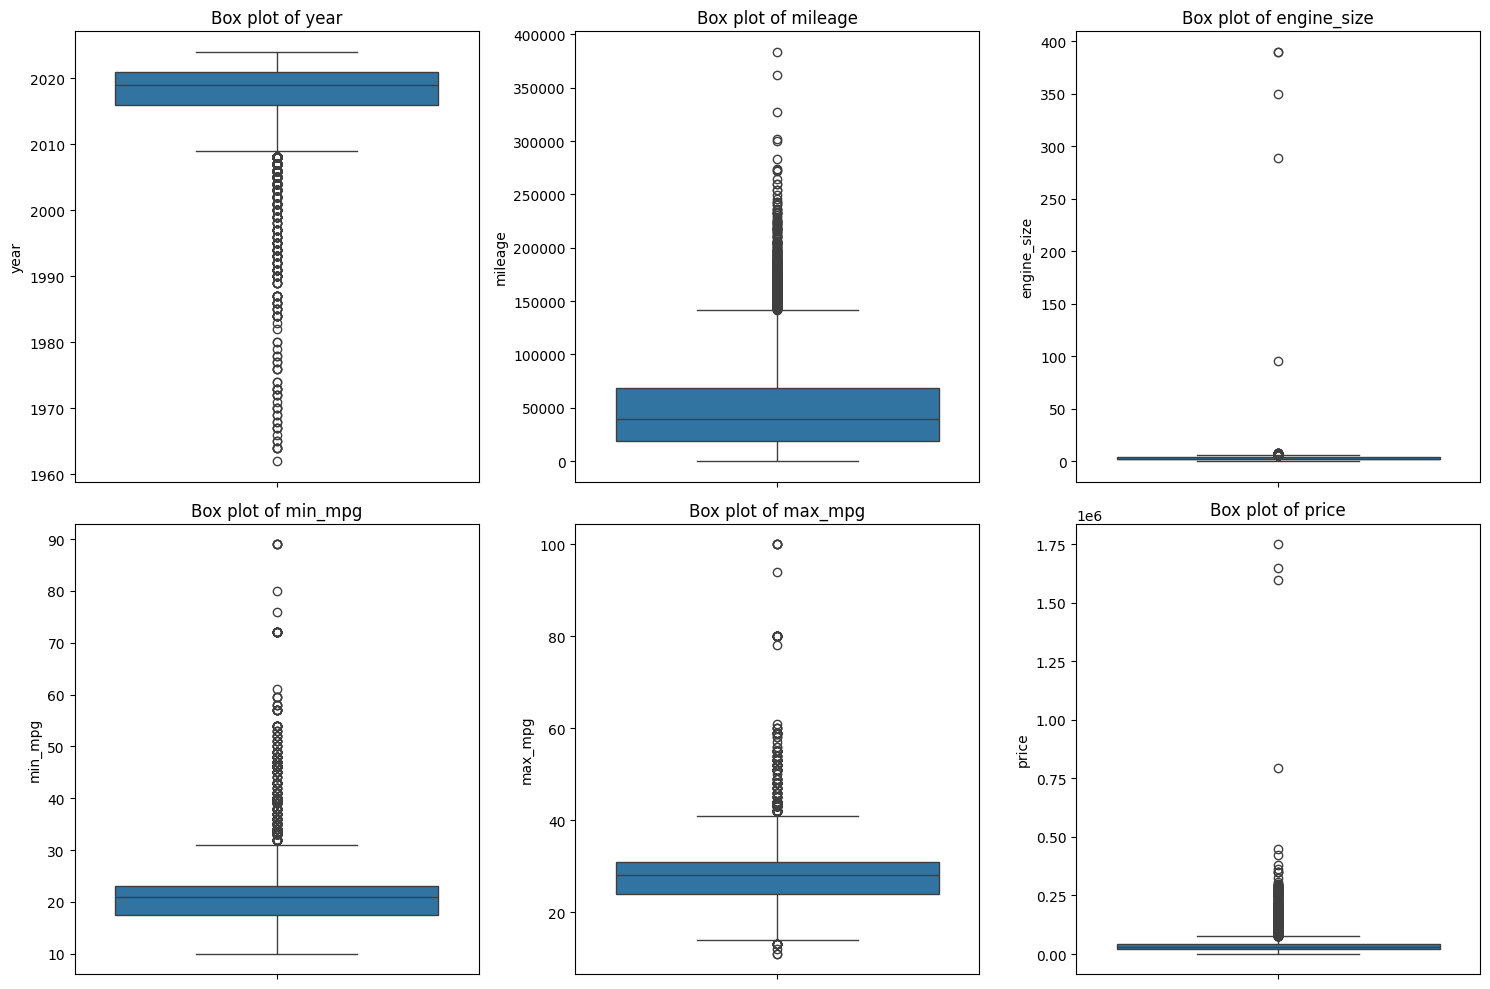

In [15]:
columns_for_boxplot = ['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 'price']

plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_for_boxplot, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()


Видим выбросы по объему двигателя, следовательно удаляем их.
Так же количество экземпляров дорогих авто крайне мало поэтому обучать на них нет смысла - тоже удаляем.

Значения min/max_mpg обработаем отдельно

In [16]:
df = df[df['engine_size'] <= 20]
df = df[df['price'] < 0.6 * 10**6]

In [17]:
binary_columns = [
    'automatic_transmission', 'damaged', 'first_owner', 'personal_using', 'turbo', 'alloy_wheels',
    'adaptive_cruise_control', 'navigation_system', 'power_liftgate', 'backup_camera', 'keyless_start',
    'remote_start', 'sunroof/moonroof', 'automatic_emergency_braking', 'stability_control',
    'leather_seats', 'memory_seat', 'third_row_seating', 'apple_car_play/android_auto',
    'bluetooth', 'usb_port', 'heated_seats'
]

for col in binary_columns:
    if col in df.columns:
        df[col] = df[col].astype(bool)


Сделаем строковые значения категориальными и посмотрим на количество уникальных значений

In [18]:
columns = ['brand', 'model', 'engine', 'transmission', 'fuel_type', 'drivetrain', 'interior_color', 'exterior_color']

for col in columns:
    df[col] = df[col].astype('category')
    unique_count = df[col].nunique()
    print(f"Столбец '{col}' содержит {unique_count} уникальных значений.")

Столбец 'brand' содержит 25 уникальных значений.
Столбец 'model' содержит 3488 уникальных значений.
Столбец 'engine' содержит 1156 уникальных значений.
Столбец 'transmission' содержит 189 уникальных значений.
Столбец 'fuel_type' содержит 10 уникальных значений.
Столбец 'drivetrain' содержит 5 уникальных значений.
Столбец 'interior_color' содержит 958 уникальных значений.
Столбец 'exterior_color' содержит 1941 уникальных значений.


Для fuel_type используем LabelEncoder как самый просто вариант, для drivetrain применим get_dummies т.к. там 5 унинкальных значений и это не создаст много столбцов. Для остальных используем кодирование по частотам, т.к. много уникальных значений и действительно на цену может влиять именно то насколько распространены авто на рынке.

In [19]:
freq_cols = ['brand', 'model', 'engine', 'transmission', 'interior_color', 'exterior_color']
for col in freq_cols:
    freq = df[col].value_counts()
    df[col + '_freq'] = df[col].map(freq)

le = LabelEncoder()
df['fuel_type'] = le.fit_transform(df['fuel_type'].astype(str))

df = pd.get_dummies(df, columns=['drivetrain'], drop_first=True)
df

,brand,model,year,mileage,engine,engine_size,transmission,automatic_transmission,fuel_type,min_mpg,...,brand_freq,model_freq,engine_freq,transmission_freq,interior_color_freq,exterior_color_freq,drivetrain_Four-wheel Drive,drivetrain_Front-wheel Drive,drivetrain_Rear-wheel Drive,drivetrain_Unknown
0,Mazda,CX-9 Touring,2022.0,6580.0,2.5L I4 16V GDI DOHC Turbo,2.5,6-Speed Automatic,True,5,23.112245,...,780,46,146,3133,8151,67,True,False,False,False
1,Alfa,Romeo Stelvio 4DR SUV AWD,2018.0,62717.0,Twin Turbo Premium Unleaded V-6 2.9 L/176,2.9,Automatic,True,5,19.934066,...,774,2,4,2754,8151,2,True,False,False,False
2,Chevrolet,Silverado 1500 Limited LT,2022.0,15463.0,5.3L V8 16V GDI OHV,5.3,Automatic,True,5,15.921788,...,734,1,184,2754,647,52,True,False,False,False
3,Land,Rover Range Rover P400 SE,2022.0,1281.0,3.0L I6 24V GDI DOHC Turbo,3.0,Automatic,True,5,17.522801,...,786,7,350,2754,739,274,True,False,False,False
4,Mitsubishi,Outlander Sport 2.0 SE,2021.0,36727.0,2.0L I4 16V MPFI DOHC,2.0,Automatic CVT,True,5,22.470811,...,781,34,486,1588,8151,1065,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19104,Lexus,RC 350 Base,2017.0,77886.0,3.5L V6 24V PDI DOHC,3.5,8-Speed Automatic,True,5,16.000000,...,754,9,320,5404,8151,41,False,False,True,False
19105,Chevrolet,Camaro 2SS,2020.0,30921.0,6.2L V8 16V GDI OHV,6.2,10-Speed Automatic,True,5,16.000000,...,734,14,193,662,647,1445,False,False,True,False
19106,Hyundai,Palisade Calligraphy,2021.0,25490.0,3.8L V6 24V GDI DOHC,3.8,8-Speed Automatic,True,5,22.151163,...,841,26,225,5404,8151,15,True,False,False,False
19107,Honda,Accord Sport,2019.0,30840.0,1.5L I4 16V GDI DOHC Turbo,1.5,Automatic CVT,True,5,29.000000,...,803,6,255,1588,982,1065,False,True,False,False


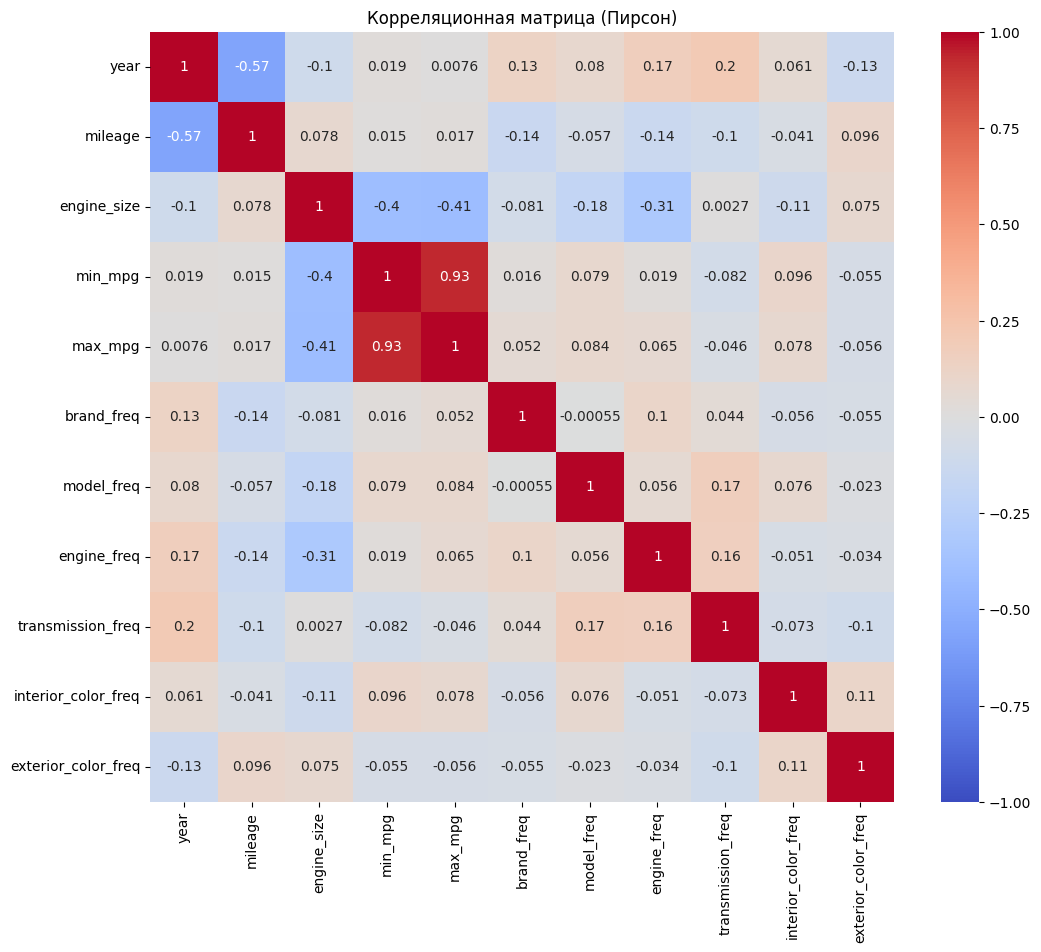

In [20]:
columns_with_number = ['year', 'mileage', 'engine_size', 'min_mpg', 'max_mpg', 
                    'brand_freq', 'model_freq', 'engine_freq', 'transmission_freq', 
                    'interior_color_freq', 'exterior_color_freq']
corr_matrix = df[columns_with_number].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Корреляционная матрица (Пирсон)')
plt.show()

Видим что min_mpg и max_mpg сильно коррелируют, заменим на avg_mpg с средним по двум значениям. 

In [21]:
df['avg_mpg'] = (df['min_mpg'] + df['max_mpg']) / 2

Оставляем только столбцы с числами и разобьем на тренировочную валидационную и тестовую выборки  
Столбец цены будем масштабировать делением на константу т.к. при больших значениях целевой переменной будем получать большие значения для градиентов, что будет мешать сходимости.

In [22]:
df_numeric = df.drop(columns=['brand', 'model', 'engine', 'transmission', 'interior_color', 'exterior_color', 'min_mpg', 'max_mpg'])
df_numeric['price'] = df_numeric['price'] / 10000

X = df_numeric.drop(columns=['price'])
y = df_numeric['price']


X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1 / 0.8, random_state=11)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)


(13345, 37) (13345,)
(1907, 37) (1907,)
(3814, 37) (3814,)


Наконец стандартизируем признаки. Обучение на тестовой, на валидационной и тестовой только transform.

In [23]:
columns_to_scale = ['year', 'mileage', 'engine_size', 'avg_mpg', 
                    'brand_freq', 'model_freq', 'engine_freq', 'transmission_freq', 
                    'interior_color_freq', 'exterior_color_freq']

scaler = StandardScaler()
X_train[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_val[columns_to_scale] = scaler.transform(X_val[columns_to_scale])
X_test[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

In [24]:
X_train.describe()

,year,mileage,engine_size,fuel_type,brand_freq,model_freq,engine_freq,transmission_freq,interior_color_freq,exterior_color_freq,avg_mpg
count,1.334500e+04,1.334500e+04,1.334500e+04,13345.000000,1.334500e+04,1.334500e+04,1.334500e+04,1.334500e+04,1.334500e+04,1.334500e+04,1.334500e+04
mean,-2.072580e-14,-7.613909e-17,1.703812e-17,4.962383,-2.630259e-16,-3.194647e-17,1.064882e-18,4.745382e-17,3.727088e-17,-2.875182e-17,8.093106e-17
std,1.000037e+00,1.000037e+00,1.000037e+00,0.522939,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00,1.000037e+00
min,-1.107282e+01,-1.259521e+00,-2.377021e+00,1.000000,-1.158087e+01,-7.208160e-01,-6.552240e-01,-1.405623e+00,-9.435972e-01,-5.985326e-01,-2.427872e+00
25%,-3.746086e-01,-7.498024e-01,-7.216769e-01,5.000000,-2.414151e-01,-5.903049e-01,-5.854470e-01,-1.041970e+00,-9.281535e-01,-5.683026e-01,-6.291936e-01
50%,2.425960e-01,-2.256681e-01,-3.078408e-01,5.000000,1.118914e-01,-3.619104e-01,-3.426229e-01,8.411786e-03,-7.482352e-01,-4.729620e-01,3.438099e-04
75%,6.540658e-01,5.342054e-01,5.198315e-01,5.000000,3.810774e-01,9.487850e-02,-4.397725e-02,1.369543e+00,1.154163e+00,-1.241549e-01,4.500134e-01
max,1.271270e+00,8.850357e+00,4.327124e+00,8.000000,1.121339e+00,4.760651e+00,2.588012e+00,1.369543e+00,1.154163e+00,2.759317e+00,1.259109e+01


## Вывод

Данные были изучены и предварительно обработаны к обучению на них моделей для решения задачи регрессии.

In [ ]:
df.to_csv('data/df_after_hw_1.csv', index=False)